# Composing and fitting distributions with Carl

Gilles Louppe, January 2016.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import theano
import theano.tensor as T

## Base API

In [2]:
from carl.distributions import Normal
p = Normal(mu=1.0, sigma=2.0)

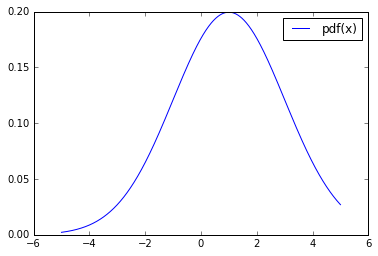

In [3]:
reals = np.linspace(-5, 5, num=1000)
plt.plot(reals, p.pdf(reals.reshape(-1, 1)), label="pdf(x)")
plt.legend(loc="best")

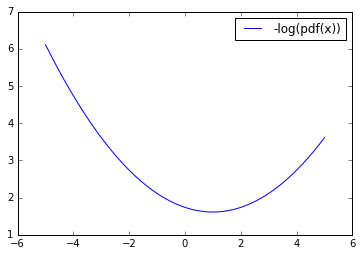

In [4]:
reals = np.linspace(-5, 5, num=1000)
plt.plot(reals, p.nnlf(reals.reshape(-1, 1)), label="-log(pdf(x))")
plt.legend(loc="best")

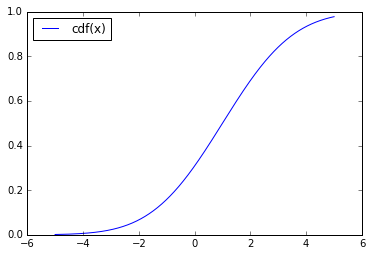

In [5]:
reals = np.linspace(-5, 5, num=1000)
plt.plot(reals, p.cdf(reals.reshape(-1, 1)), label="cdf(x)")
plt.legend(loc="best")

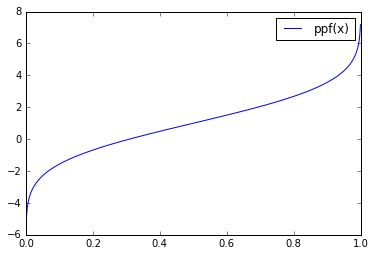

In [6]:
reals = np.linspace(0, 1, num=1000)
plt.plot(reals, p.ppf(reals.reshape(-1, 1)), label="ppf(x)")
plt.legend(loc="best")

In [7]:
p.rvs(n_samples=10000)

array([[ 2.28294382],
       [ 0.84798443],
       [ 1.2158958 ],
       ..., 
       [ 3.28424212],
       [-1.06580103],
       [ 1.71299251]])

## Advanced API

In [8]:
from carl.distributions import Normal
p = Normal(mu=1.0, sigma=2.0)

In [9]:
p.parameters_

{mu, sigma}

In [10]:
p.constants_

set()

In [11]:
p.observeds_

set()

In [12]:
a = theano.shared(1.0, name="a")
b = theano.shared(2.0, name="b")
c = T.constant(0.5, name="c")
p = Normal(mu=a * c, sigma=a + b)

In [13]:
p.mu

Elemwise{mul,no_inplace}.0

In [14]:
p.mu.eval()

array(0.5)

In [15]:
p.parameters_

{a, b}

In [16]:
p.constants_

{TensorConstant{0.5}}

In [17]:
p.observeds_

set()

In [18]:
a = T.dmatrix(name="a")
b = theano.shared(-1.0, name="b")
c = theano.shared(3.0, name="c")
p = Normal(mu=a*b + c)

In [19]:
p.parameters_

{c, sigma, b}

In [20]:
p.constants_

set()

In [21]:
p.observeds_

{a}

In [22]:
reals = np.linspace(-5, 5, num=1000)
plt.plot(reals, p.pdf(X=reals.reshape(-1, 1)))

TypeError: Missing required input: a

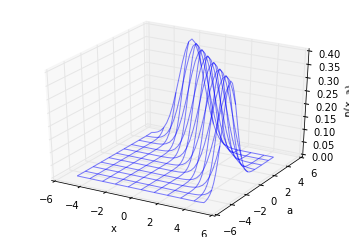

In [23]:
import mpl_toolkits.mplot3d.axes3d as axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

Xs = np.arange(-5, 5, 0.25)
As = np.arange(-5, 5, 0.25)
Xs, As = np.meshgrid(Xs, As)

Ps = p.pdf(X=Xs.reshape(-1, 1), 
           a=As.reshape(-1, 1))
Ps = Ps.reshape(Xs.shape)

ax.plot_wireframe(Xs, As, Ps, rstride=4, cstride=4, alpha=0.5)
ax.set_xlabel("x")
ax.set_ylabel("a")
ax.set_zlabel("p(x, a)")

plt.show()

## Composing mixtures

In [24]:
from carl.distributions import Mixture

components = [
    Normal(mu=-2.0, sigma=0.75),   # c0
    Normal(mu=0.0, sigma=2.0),     # c1
    Normal(mu=1.0, sigma=0.5)      # c2 (bump)
]

g = theano.shared(0.05, name="g") 
p = Mixture(components=components, weights=[0.5 - g / 2., 0.5 - g / 2., g])

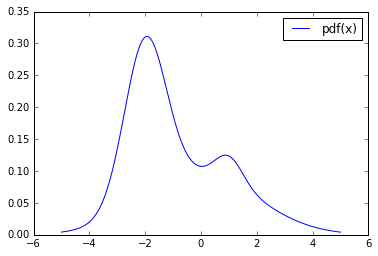

In [25]:
reals = np.linspace(-5, 5, num=1000)
plt.plot(reals, p.pdf(reals.reshape(-1, 1)), label="pdf(x)")
plt.legend()

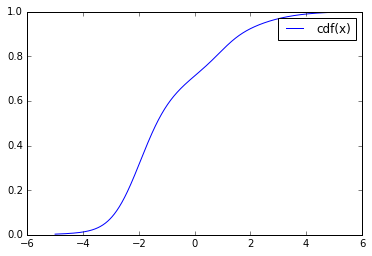

In [26]:
reals = np.linspace(-5, 5, num=1000)
plt.plot(reals, p.cdf(reals.reshape(-1, 1)), label="cdf(x)")
plt.legend()

In [27]:
p.weights

[Elemwise{true_div,no_inplace}.0,
 Elemwise{true_div,no_inplace}.0,
 Elemwise{true_div,no_inplace}.0]

In [28]:
p.compute_weights()

array([ 0.475,  0.475,  0.05 ])

## Fitting parameters to data

In [29]:
p0 = Normal(mu=1.0, sigma=1.37)
p1 = Normal()
X = p0.rvs(10000)
p1.fit(X, bounds=[{"param": p1.sigma, "bounds": (0, None)}])

Normal(mu=mu, random_state=None, sigma=sigma)

In [30]:
p1.mu.eval(), p1.sigma.eval()

(array(0.9925338472455978), array(1.379345049371404))

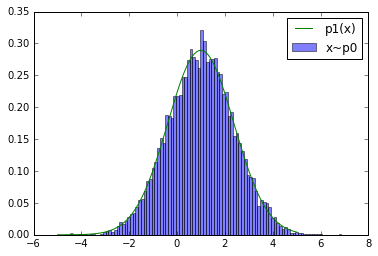

In [31]:
reals = np.linspace(-5, 5, num=1000)
plt.hist(X.ravel(), bins=100, normed=1, alpha=0.5, label="x~p0")
plt.plot(reals, p1.pdf(reals.reshape(-1, 1)), label="p1(x)")
plt.legend()